In [68]:
from sklearn.datasets import load_wine
data_df=load_wine()


In [69]:

x=data_df.data
y=data_df.target
print("Feature array shape:",x.shape)
print("Target array shape:",y.shape)

Feature array shape: (178, 13)
Target array shape: (178,)


In [70]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x)
x_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [71]:
#covariance matrix
import numpy as np
cov_mat=np.cov(x_std.T)
cov_mat

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [72]:
#find eigne value and eigen vector
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [73]:
var_exp=[i*100/np.sum(eig_val)for i in sorted(eig_val,reverse=True)]
var_exp

[36.19884809992632,
 19.20749025700896,
 11.123630536249989,
 7.069030182714012,
 6.5632936796485914,
 4.935823319222561,
 4.238679322623317,
 2.6807489483788665,
 2.222153404789707,
 1.930019093944079,
 1.7368356899899156,
 1.2982325756042177,
 0.7952148898994557]

In [74]:
cum_exp_var=np.cumsum(var_exp)
sorted(cum_exp_var)

[36.19884809992632,
 55.40633835693528,
 66.52996889318527,
 73.59899907589929,
 80.16229275554788,
 85.09811607477045,
 89.33679539739376,
 92.01754434577262,
 94.23969775056233,
 96.16971684450641,
 97.90655253449633,
 99.20478511010054,
 100.0]

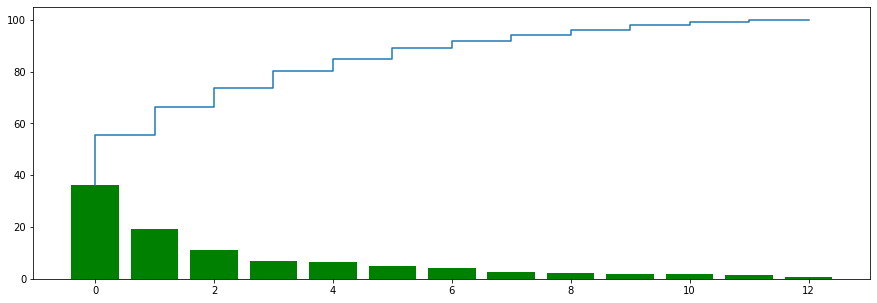

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(range(len(var_exp)),var_exp,label="Individual explained variance",color="g")
plt.step(range(len(cum_exp_var)),cum_exp_var,label="cumulative explained variance")
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3)

In [78]:
classifier = RandomForestClassifier(max_depth=2,random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [79]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 1, 1])

In [80]:
cm = confusion_matrix(y_test, y_pred)
acc_score=accuracy_score(y_test, y_pred)
print("Confusion matrix:\n",cm)
print("Accuracy score",acc_score)

Confusion matrix:
 [[14  0  0]
 [ 0 22  1]
 [ 0  0 17]]
Accuracy score 0.9814814814814815


In [81]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_x_train=pca.fit_transform(x_train)
pca_x_test=pca.transform(x_test)

In [82]:
# Fitting Logistic Regression to the Training set

classifier = RandomForestClassifier(max_depth=2,random_state=0)
classifier.fit(pca_x_train,y_train)
y_pred=classifier.predict(pca_x_test)

In [83]:

y_pred

array([0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 1, 1])

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score=accuracy_score(y_test, y_pred)
print("Confusion matrix:\n",cm)
print("Accuracy score",acc_score)

Confusion matrix:
 [[13  1  0]
 [ 0 22  1]
 [ 0  0 17]]
Accuracy score 0.9629629629629629


In [85]:
print(pca_x_train.shape)
print(pca_x_test.shape)

(124, 2)
(54, 2)
